#campoElectrico
Esta función calcula el campo electrico de dos cargas
calculemos primero el campo electrico en nun punto  $P = (x_p,y_p)$ generado por una carga

\begin{equation}
E_p = \frac{1}{4πϵ_0}\frac{q}{r_p^2}u_r = \frac{K_eq}{r_p^2}u_r
\end{equation}
Recibe como parámetros:

q: valor de la carga expresada en nanoCoulomb x10^(-9).

x: posición x de la carga en metros.

y: posición y de la carga en metros.

xp: posición x del punto donde se desa medir el campo en metros.

yp: posición y del punto donde se desa medir el campo en metros.

retorna un array [cx,cy], con las componentes x, y del campo eléctico generado por por la carga en el punto dado.
#campoElectricoDosCargas
Esta función dibuja el campo electrico generado por dos cargas. Recibe como parámetros:

q1:carga uno, diccionario de la forma: {"q":110,"x":-4.5,"y":0}, con q expresado en nanoCoulombs, x en metros, y en metros.

q2:carga dos, diccionario de la forma: {"q":-110,"x":-4.5,"y":0}, con q expresado en nanoCoulombs, x en metros, y en metros.

In [13]:
import numpy as np
import matplotlib.pylab as plt

def campoElectrico(q, x, y, xp, yp):
  r = np.array([x,y])
  p = np.array([xp,yp])
  rp = p-r
  rp_mag = np.sqrt((rp[0]**2)+(rp[1]**2))
  if rp_mag != 0:
    sin = (rp[1]/rp_mag)
    cos = (rp[0]/rp_mag)
    Ex = ((9*q*cos)/(rp_mag**2))
    Ey = ((9*q*sin)/(rp_mag**2))
  else:
    Ex = 0
    Ey = 0
  return np.array([Ex,Ey])

def colorQ (q):
  return "bo" if (q > 0) else "ro"

def campoElectricoDosCargas(q1, q2):
  plt.figure()
  distancia = np.sqrt((q1["x"]-q2["x"])**2 + (q1["y"]-q2["y"])**2)
  dist = round(distancia/4.5, 2)
  plt.plot(q1["x"],q1["y"], colorQ(q1["q"]))
  plt.annotate("q1", (q1["x"],q1["y"]), fontsize=10)
  plt.plot(q2["x"],q2["y"], colorQ(q2["q"]))
  plt.annotate("q2", (q2["x"],q2["y"]), fontsize=10)
  minx = np.array([q1["x"], q2["x"]]).min()-(2*dist)
  miny = np.array([q1["y"], q2["y"]]).min()-(2*dist)
  maxx = np.array([q1["x"], q2["x"]]).max()+(2*dist)
  maxy = np.array([q1["y"], q2["y"]]).max()+(2*dist)
  for x in np.arange(minx,maxx+(1.1*dist), dist):
    for y in np.arange(miny,maxy+(1.1*dist), dist):
      c1 = campoElectrico(q1["q"],q1["x"], q1["y"], x, y)
      c2 = campoElectrico(q2["q"],q2["x"], q2["y"], x, y)
      c = c1 + c2
      plt.quiver(x,y,c[0],c[1],width=0.003)
  plt.xlabel("x [m]")
  plt.ylabel("y [m]")
  plt.title("Campo Eléctrico")
  plt.gca().set_aspect('equal')


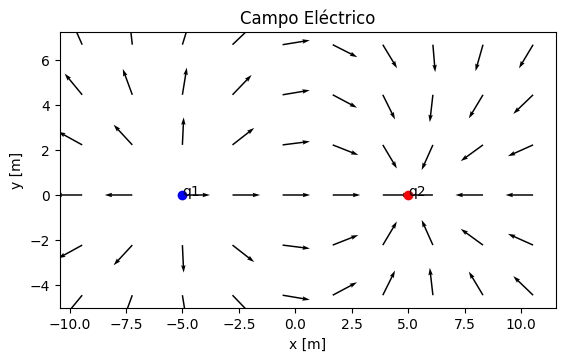

In [14]:
dicQ1 = {"q":11000.0,"x":-5,"y":0}
dicQ2 = {"q":-11000.0,"x":5,"y":0}

campoElectricoDosCargas(dicQ1, dicQ2)